# 2. Implement a simple classification algorithm
- Intuitively understand machine learning algorithms
- Read, process, and visualize data with Pandas, Numpy, and Matplops
- Implementing a linear classification algorithm in python

## 2.1 Artificial Neurons: A Brief History of Early Machine Learning
### 2.1.2 Perceptron learning rules
1. Initialize the weights to zero or a small random value
2. Do the following on each training sample $x^{(i)}$
    - Compute the output value $\hat {y}$
    - Update weights
    
Individual weights $w_{j}$ in weight vector $w$ are updated simultaneously
$$w_{j} := w_{j} + \Delta w_{j}$$
The $w_{j}$ value used to update the weights $\Delta w_{j}$ is calculated according to the perceptron learning rules
$$\Delta w_{j} = \eta (y^{(i)} - \hat{y}^{(i)})x_{j}^{(i)}$$
$\eta$ is learning rate(typically an integer between 0.0 and 1.0)  
$y^{(i)}$is true class label of the $i$th training sample  
$\hat {y}^{(i)}$is predicted class label  
It is important to update all weights in the weight vector at the same time  
$$
\Delta w_{0} = \eta (y^{(i)} - output^{(i)})\\
\Delta w_{1} = \eta (y^{(i)} - output^{(i)})x_{1}^{(i)}\\
\Delta w_{2} = \eta (y^{(i)} - output^{(i)})x_{2}^{(i)}
$$
In both cases where Perceptron correctly predicted the class label, the weight remains unchanged.
$$
\Delta w_{j} = \eta (-1--1)x_{j}^{(i)} = 0\\
\Delta w_{j} = \eta (1-1)x_{j}^{(i)} = 0
$$
If wrongly predicted, move weights toward positive or negative target classes
$$
\Delta w_{j} = \eta (1--1)x_{j}^{(i)} = \eta (2)x_{j}^{(i)}\\
\Delta w_{j} = \eta (-1-1)x_{j}^{(i)} = \eta (-2)x_{j}^{(i)}
$$
Perceptron ensures convergence only when the two classes are linearly separated and the learning rate is small enough

## 2.2 Implement Perceptron Learning Algorithm in Python
### 2.2.1 Object Oriented Perceptron API

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron Classifier
    
    parameter
    ------------
    eta : float
        running rate (between 0 and 1)
    n_iter : int
        training dataset iterations
    random_state : int
        random number generator seed for weight randomization
    
    attribute
    ------------
    w_ : 1d-array
        learned weights
    errors_ :list
        cumulative classification error per epoch
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Training data learning
        
        parameter
        -------------
        X : {array-like}, shape = [n_samples, n_features]
            Training data consisting of n_samples samples and n_features characteristics
        y : array-like, shape = [n_samples]
            tsrget value
            
        Conversion value
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ =rgen.normal(loc=0.0, scale=0.01,
                            size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """final input calculation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label using unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Use this perceptron implementation to initialize a new Perceptron object with a learning rate of eta and an epoch number of n_iter  
In the fit method, initialize the weight self.w_ to the vector $\mathbb{R}^{m+1}$($m$ is the number of dimensions in the dataset)  
rgen is a numpy random number generator that can reproduce the same results as before with a random seed that you specified  
If the weight is not 0, the learning rate $\eta$ may affect the classification results  
If the weight is reset to 0, the learning rate parameter eta only affects the size, not the direction of the weight vector  

In [2]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np. linalg.norm(v2)))

0.0

Use the vector dot $ a\cdot b =|a||b|cos\theta$ expression to calculate the angles of two vectors of different sizes only  
Vector orientation does not change when only the size is changed to $\eta$  
The fit method initiates the weights and updates the weights in accordance with the Perceptron learning rules, touring all individual gamble in the training set repeatedly  
Class labels are predicted in the Predict method  
The predict method can also be used to predict the class label of new data after the model has been trained  

### 2.2.2 Perceptron training in brush-flowing datasets
Use only two classes, Sestosa and Versicolor, in the boolean dataset to test the perceptron implementation  
Consider only calyx length and petal length for visualization  


Check with the tail method to verify that the data loaded correctly

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


The values method of the Pandas DataFrame returns an array of Numpy

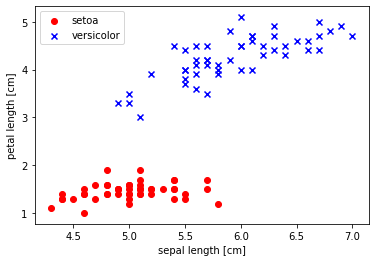

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Select setosa and versicolor
y = df.iloc[0: 100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract calyx length and petal length
X = df.iloc[0: 100, [0, 2]].values

# Draw a scatter plot
plt.scatter(X[:50, 0], X[:50, 1],
           color= 'red', marker= 'o', label= 'setoa')
plt.scatter(X[50:100, 0], X[50: 100, 1],
           color='blue', marker= 'x', label= 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In this two-dimensional subspace, a linear crystal boundary is sufficient to distinguish Setosa and Versicolor flowers


Graph the misaligned error against the epoch to see if the algorithm converges to find the decision boundary that separates the two iris classes

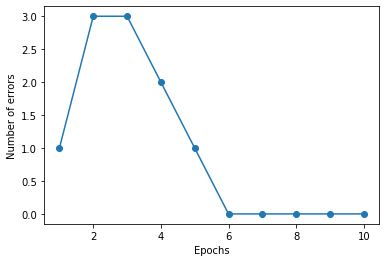

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

As you can see in the graph above, Perceptron converged after the sixth epoch and perfectly classified the training samples  

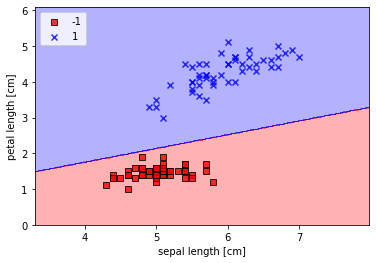

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #Set markers and colormaps
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'ligthgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Draw decision boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #Draw a scatterplot of a sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolors='black')
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As you can see in the graph above, the decision boundary learned by Perceptron perfectly classifies all samples in a dataset consisting of two irises

## 2.3 ADAptive Linear NEuron(ADALINE) and Convergence of Learning

ADALINE demonstrates the key concepts of defining and minimizing cost functions as continuous functions  
The main difference between Adalin's rule and Rosenblatt Perceptron is the use of linear activation functions instead of unit step functions, like Perceptron, to update the hatch  
In Adalin, the linear activation function $\phi (z)$ is the same function as the final input  
$$
\phi (w^{T}x) = w^{T}x
$$
- Comparison of Perceptron and Adalin Algorithms
<img src="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png">

The Adalin algorithm compares the real class labels with the real output values of the linear activation function to calculate the model's error and update the weights  
On the other hand, Perceptron compares the real class label with the predicted class label  

### 2.3.1 Gradient descent minimizes cost function
The key component of the supervised learning algorithm is the objective function that you define to optimize during the learning process  
The objective cost function is usually the objective function  
Adalin defines a cost function $J$ to learn the weights as the sum of squared errors(SSE) between the calculated output and the true class label  
$$
J(w) = \frac {1}{2} {\sum}_i (y^{(i)} - \phi(z^{(i)}))^{2}
$$

The advantage of using a continuous linear activation function instead of a unit calculation function is that the cost function becomes differentiable  
Another advantage of this cost function is that it is a convex function


<img src="https://t1.daumcdn.net/cfile/tistory/99E6363359D86A8805">

Gradient descent updates the weights slightly in the opposite direction to gradient $\Delta J(w)$ in cost function $J$  
$$
w:=w+\Delta W
$$

The weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$  
$$
\Delta w =-\eta\triangledown J(w)
$$

To calculate the gradient of the cost function we need to calculate the partial derivative for each weight $w_{j}$
$$
\frac {\partial J}{\partial w_{j}} = -\sum _i(y^{(i)} - \phi (z^{(i)}))x_{j}^{(i)}
$$

So you can write the update formula of weight $w_{j}$ as
$$
\Delta w_{j} = -\eta \frac {\partial J}{\partial w_{j}} = \eta \sum _i(y^{(i)}-\phi (z^{(i)}))x_{j}^{(i)}
$$

Because all weights are updated at the same time, the adaline learning rules are as follows:
$$
w:=w+\Delta w
$$

The adaline learning rule looks the same as the perceptron rule, but $z^{(i)}=w^{T}x^{(i)}$ is a real number, not an integer class label  
It also calculates weighted updates based on all the samples in the training set  
This method is called batch gradient descent

### 2.3.2 Implement Adaline in Python

In [7]:
class AdalineGD(object):
    """Adaline claasifier
    
    parameter
    --------------
    eta : float
        learning rate (between 0.0 and 1.0)
    n_iter : int
        Implement Adaline in Python
    random_state : int
        Random Number Generator Seed for Weight Randomization
        
    attribute
    --------------
    w_ : 1d-array
        learned weights
    cost_ : list
        Sum of squared cost functions per epoch
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Training data learning
        
        parameter
        -------------
        X : {array-like}, shape = [n_samples, n_features]
            Training data consisting of n_samples samples and n_features characteristics
        y : array-like, shape = [n_samples]
            tsrget value
            
        Conversion value
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta *X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """final input calculation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """linear activation calculation"""
        return X
    
    def predict(self, X):
        """Return class label using unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Evaluate each individual training sample like Perceptron and then calculate the gradient based on the entire training dataset without updating the weights  
We added an activation function to show how information flows through a single layer neural network  
We need to experiment several times to find a good learning rate $\eta$ that converges optimally  
Two learning rates, $\eta = 0.01$ and $\eta = 0.0001$, show how well the adaline implementation learns from the training data

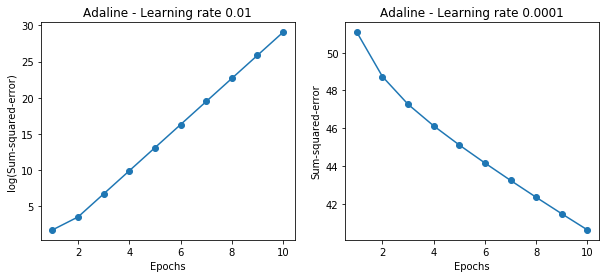

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

The left graph shows that the learning rate is so large that the cost function cannot be minimized and the error becomes larger per epoch  
The graph on the right reduces the cost but the learning rate $\eta=0.0001$ is so small that the algorithm needs a lot of epochs to converge to the global minimum

<img src ="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" >

### 2.3.3 Adjusting property scales to improve gradient descent results

Machine learning algorithms require feature scaling in some way for optimal performance  
Gradient descent is one of many algorithms that can benefit from adjusting the property scale  
A property scale method called standardization gives the data the properties of a standard normal distribution to help gradient descent learning converge more quickly  
Normalization sets the mean of each property to 0 and makes the standard deviation of the property 1  
- for example, to normalize the $j$th characteristic, we subtract the mean $\mu_{j}$ from all the samples and divide by the standard deviation $\sigma_{j}$  
$$
x'_{j}=\frac {x_{j}-\mu_{j}}{\sigma_{j}}
$$  


$x_{j}$ is the vector containing the $j$ th characteristic value for all $n$ training samples  
One of the reasons that standardization can help with gradient descent is because it takes fewer steps to find the best solution  
Standardization can be handled simply with the Numpy built-in functions mean and std

In [9]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean()) / X[:,1].std()

After standardizing, train the Adaline model again and see how many epochs converge at a learning rate of $\eta = 0.01$

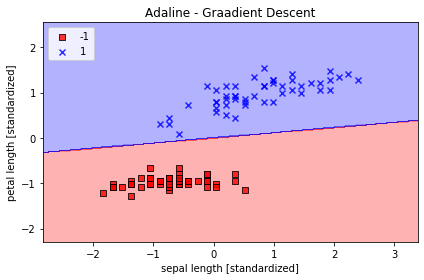

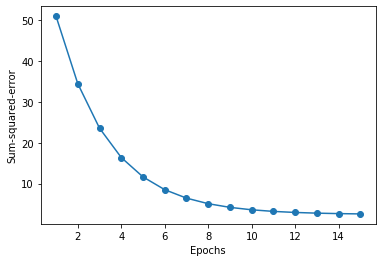

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Graadient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Using the learning rate $\eta= 0.01$ and training on standardized features, the Adalin model converged  
SSE is not zero even if all samples are perfectly classified  

### 2.3.4 Large scale machine learning and stochastic gradient descent
stochastic gradient descent is another alternative to batch gradient descent  
Instead of updating the weights based on the sum of the accumulated errors for all samples x, update the weights slightly for each training sample  
$$
\Delta w = \eta{\sum}_{i}(y^{(i)}-\phi(z^{(i)}))x^{(i)}
$$

$$
\Delta w = \eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}
$$

Stochastic gradient descent is much faster in convergence because the weights are updated more often  
Since the gradient is calculated based on one training sample, the trajectory of the error is much more dizzy than the batch gradient descent method  
In order to achieve satisfactory performance in stochastic gradient descent, it is important to randomly inject the training sample sequence. It's also a good idea to mix training sets for each epoch so they don't cycle  
Another advantage of stochastic gradient descent is the use of online learning to train as new training data arrives  

Because we have implemented the Adaline learning rule with gradient descent, we can update the weights with stochastic gradient descent with a little modification of the learning algorithm

In [13]:
class AdalineSGD(object):
    """Adaline claasifier
    
    parameter
    --------------
    eta : float
        learning rate (between 0.0 and 1.0)
    n_iter : int
        Implement Adaline in Python
    shuffle : bool (default: True)
        If set to True, the training data will be mixed for each epoch to avoid the same iteration
    random_state : int
        Random Number Generator Seed for Weight Randomization
        
    attribute
    --------------
    w_ : 1d-array
        learned weights
    cost_ : list
        Sum of squared cost functions per epoch
        
    """
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """Training data learning
        
        parameter
        -------------
        X : {array-like}, shape = [n_samples, n_features]
            Training data consisting of n_samples samples and n_features characteristics
        y : array-like, shape = [n_samples]
            tsrget value
            
        Conversion value
        -------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """learn training data without reinitializing weights """
        if not self.w_initialized:
            self,_initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize the weight to a small number"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                  size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """update weights by applying adaline learning rules"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta *xi.dot(error)
        self.w_[0] += self.eta *error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """final input calculation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """linear activation calculation"""
        return X
    
    def predict(self, X):
        """Return class label using unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

The partial_fit method can be used in online learning without reinitializing the weights  
After training, we calculate the average cost of the training sample per epoch to see if the algorithm converges  
When optimizing the cost function, add an option to mix training samples before every epoch so that no recursive cycles occur  

Train the AdalineSGD classifier with the fit method, and plot the training results with plot_dacision_regions

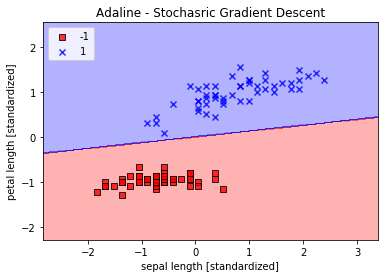

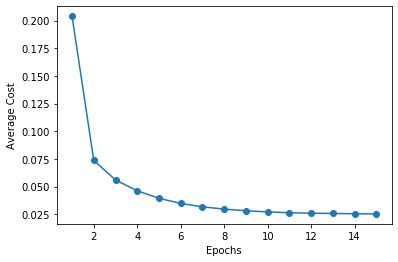

In [14]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochasric Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

Average cost decreases significantly faster  